In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mysmilesdataste/SMILES_Big_Data_Set.csv
/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/FFV.pth
/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Rg.pth
/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Tg.pth
/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Tc.pth
/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Densiy.pth
/kaggle/input/my_trained_model/pytorch/default/1/config.json
/kaggle/input/my_trained_model/pytorch/default/1/added_tokens (1).json
/kaggle/input/my_trained_model/pytorch/default/1/merges.txt
/kaggle/input/my_trained_model/pytorch/default/1/training_args.bin
/kaggle/input/my_trained_model/pytorch/default/1/tokenizer.json
/kaggle/input/my_trained_model/pytorch/default/1/vocab.json
/kaggle/input/my_trained_model/pytorch/default/1/tokenizer_config.json
/kaggle/input/my_trained_model/pytorch/default/1/model.safetensors
/kaggle/input/my_trained_model/pytorch/default/1/special_tokens_map.json
/kaggle/input/deepchem

In [2]:
# !pip install /kaggle/input/rdkit-install-whl/rdkit_wheel/numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl
!pip install /kaggle/input/rdkit-install-whl/rdkit_wheel/pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl
!pip install /kaggle/input/rdkit-install-whl/rdkit_wheel/rdkit_pypi-2022.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

Processing /kaggle/input/rdkit-install-whl/rdkit_wheel/pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl
pillow is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/rdkit-install-whl/rdkit_wheel/rdkit_pypi-2022.9.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl


In [3]:
!pip install --no-index --find-links=/kaggle/input/transformers-4-28-0/ tokenizers
!pip install --no-index --find-links=/kaggle/input/transformers-4-28-0/ transformers

Looking in links: /kaggle/input/transformers-4-28-0/
Looking in links: /kaggle/input/transformers-4-28-0/


In [4]:
# !pip install --no-index --find-links=/kaggle/input/rdkit-install-whl/rdkit_wheel rdkit
# !pip install xgboost catboost cuml-cu11 --extra-index-url=https://pypi.nvidia.com

In [5]:
train_df=pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train.csv')
extra_df=pd.read_csv('/kaggle/input/myfinal-polymer-info/JCIM_sup_bigsmiles.csv')

In [6]:
extra_df=extra_df[["SMILES","Tg (C)"]]


In [7]:
import pandas as pd

# Try reading the file with 'latin1' encoding
extra_df_Big_data = pd.read_csv(
    "/kaggle/input/mysmilesdataste/SMILES_Big_Data_Set.csv"
    
)

extra_df_Big_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMILES     16087 non-null  object 
 1   pIC50      15037 non-null  float64
 2   mol        16087 non-null  object 
 3   num_atoms  16087 non-null  int64  
 4   logP       16087 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 628.5+ KB


In [8]:
extra_df=extra_df.rename(columns={'Tg (C)':'Tg'})

In [9]:
new_df1=train_df[['SMILES','Tg']].dropna()
new_df2=extra_df[['SMILES','Tg']].dropna()

In [10]:
mask = (new_df2['SMILES'].str.len() > 10) 

# Apply the mask to the DataFrame
new_df2 = new_df2[mask]

In [11]:
final_df=pd.concat([new_df1,new_df2]).drop_duplicates()

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import KFold
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.linear_model import Ridge
from rdkit import Chem
from rdkit.Chem import (
    Descriptors, Lipinski, Crippen, rdMolDescriptors, EState, Fragments
)
from transformers import AutoTokenizer, RobertaModel
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
from rdkit import Chem
from rdkit.Chem import Descriptors, rdFingerprintGenerator
import warnings
warnings.filterwarnings('ignore')

2025-09-15 14:23:37.972912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757946218.129416      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757946218.177863      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
import numpy as np
import torch
import torch.nn as nn

from rdkit import Chem
from rdkit.Chem import Descriptors, rdFingerprintGenerator, AllChem,rdMolDescriptors
from transformers import AutoTokenizer, AutoModel
from typing import List, Union, Dict, Optional

class CMPNN(nn.Module):
    """
    Communicative Message Passing Neural Network (CMPNN) for molecular graph representation.
    """
    def __init__(self, 
                 node_dim: int = 29, 
                 edge_dim: int = 13, 
                 hidden_dim: int = 200, 
                 depth: int = 1,
                 dropout: float = 0.2):
        super(CMPNN, self).__init__()
        
        self.node_dim = node_dim
        self.edge_dim = edge_dim
        self.hidden_dim = hidden_dim
        self.depth = depth
        self.dropout = dropout
        
        # Initial linear layers
        self.node_encoder = nn.Linear(node_dim, hidden_dim)
        self.edge_encoder = nn.Linear(edge_dim, hidden_dim)
        
        # Message passing layers
        self.message_layers = nn.ModuleList()
        self.update_layers = nn.ModuleList()
        self.attention_layers = nn.ModuleList()
        
        for _ in range(depth):
            # Message function
            self.message_layers.append(nn.Linear(2 * hidden_dim, hidden_dim))
            # Update function (GRU)
            self.update_layers.append(nn.GRUCell(hidden_dim, hidden_dim))
            # Attention mechanism for communicative message passing
            self.attention_layers.append(nn.Linear(2 * hidden_dim, 1))
        
        self.dropout_layer = nn.Dropout(dropout)
        self.output_layer = nn.Linear(hidden_dim, hidden_dim)
        
    def forward(self, 
                node_features: torch.Tensor, 
                edge_features: torch.Tensor, 
                edge_index: torch.Tensor) -> torch.Tensor:
        """
        Forward pass of CMPNN.
        """
        # Encode initial features
        h = self.node_encoder(node_features)  # [num_nodes, hidden_dim]
        e = self.edge_encoder(edge_features)  # [num_edges, hidden_dim]
        
        # Get source and target nodes for each edge
        src, dst = edge_index
        
        # Message passing steps
        for step in range(self.depth):
            # Concatenate source node features and edge features
            message_input = torch.cat([h[src], e], dim=1)  # [num_edges, 2 * hidden_dim]
            
            # Compute messages
            messages = self.message_layers[step](message_input)  # [num_edges, hidden_dim]
            messages = torch.relu(messages)
            
            # Compute attention weights for communicative message passing
            attention_input = torch.cat([h[dst], messages], dim=1)  # [num_edges, 2 * hidden_dim]
            attention_weights = torch.sigmoid(self.attention_layers[step](attention_input))  # [num_edges, 1]
            
            # Apply attention to messages
            attended_messages = attention_weights * messages  # [num_edges, hidden_dim]
            
            # Aggregate messages for each target node
            aggregated = torch.zeros_like(h)  # [num_nodes, hidden_dim]
            aggregated = aggregated.index_add_(0, dst, attended_messages)  # Aggregate messages
            
            # Update node features
            h = self.update_layers[step](aggregated, h)  # [num_nodes, hidden_dim]
            h = self.dropout_layer(h)
        
        # Graph-level readout (mean pooling)
        graph_embedding = torch.mean(h, dim=0)  # [hidden_dim]
        graph_embedding = self.output_layer(graph_embedding)
        
        return graph_embedding

class MolecularFeatureExtractor:
    """
    Comprehensive molecular feature extractor with updated fingerprint generation and 3D descriptors.
    """
    
    def __init__(self, 
                 bert_model_name: str = "seyonec/ChemBERTa-zinc-base-v1",
                 cmpnn_hidden_dim: int = 300,
                 cmpnn_depth: int = 2,
                 morgan_radius: int = 2,
                 morgan_n_bits: int = 1024,
                 device: str = 'cuda'):
        """
        Initialize the molecular feature extractor.
        """
        self.device = device or ("cuda" if torch.cuda.is_available() else "cpu")
        self.bert_model_name = bert_model_name
        self.morgan_radius = morgan_radius
        self.morgan_n_bits = morgan_n_bits
        
        # Initialize BERT model
        self.tokenizer = AutoTokenizer.from_pretrained('/kaggle/input/my_tokenizer/pytorch/default/1')
        self.bert_model =  RobertaModel.from_pretrained('/kaggle/input/my_trained_model/pytorch/default/1').to(self.device)
        self.bert_model.eval()
        
        # Initialize Morgan fingerprint generator
        self.morgan_generator = rdFingerprintGenerator.GetMorganGenerator(
            radius=morgan_radius, 
            fpSize=morgan_n_bits
        )
        
        # Initialize CMPNN model with correct dimensions
        self.cmpnn = CMPNN(
            node_dim=29,  # Our atom features have 29 dimensions
            edge_dim=13,  # Our bond features have 14 dimensions
            hidden_dim=cmpnn_hidden_dim,
            depth=cmpnn_depth
        ).to(self.device)
        self.cmpnn.eval()
    
    def _get_atom_features(self, atom):
        """
        Get atom features for CMPNN (29 dimensions).
        """
        # Atomic number (one-hot for elements: C, N, O, F, P, S, Cl, Br, I, other)
        atomic_num = atom.GetAtomicNum()
        atomic_features = [0] * 10
        if atomic_num == 6:  # C
            atomic_features[0] = 1
        elif atomic_num == 7:  # N
            atomic_features[1] = 1
        elif atomic_num == 8:  # O
            atomic_features[2] = 1
        elif atomic_num == 9:  # F
            atomic_features[3] = 1
        elif atomic_num == 15:  # P
            atomic_features[4] = 1
        elif atomic_num == 16:  # S
            atomic_features[5] = 1
        elif atomic_num == 17:  # Cl
            atomic_features[6] = 1
        elif atomic_num == 35:  # Br
            atomic_features[7] = 1
        elif atomic_num == 53:  # I
            atomic_features[8] = 1
        else:  # Other
            atomic_features[9] = 1
        
        # Degree (0-5, one-hot)
        degree = atom.GetDegree()
        degree_features = [0] * 6
        if degree < 6:
            degree_features[degree] = 1
        else:
            degree_features[5] = 1
        
        # Formal charge
        formal_charge = atom.GetFormalCharge()
        
        # Radical electrons
        radical_electrons = atom.GetNumRadicalElectrons()
        
        # Hybridization (one-hot: SP, SP2, SP3, other)
        hybridization = atom.GetHybridization()
        hybridization_features = [0] * 4
        if hybridization == Chem.HybridizationType.SP:
            hybridization_features[0] = 1
        elif hybridization == Chem.HybridizationType.SP2:
            hybridization_features[1] = 1
        elif hybridization == Chem.HybridizationType.SP3:
            hybridization_features[2] = 1
        else:
            hybridization_features[3] = 1
        
        # Aromaticity
        is_aromatic = 1 if atom.GetIsAromatic() else 0
        
        # Hydrogen count (0-4, one-hot)
        hydrogen_count = atom.GetTotalNumHs()
        hydrogen_features = [0] * 5
        if hydrogen_count < 5:
            hydrogen_features[hydrogen_count] = 1
        else:
            hydrogen_features[4] = 1
        
        # Chirality
        chirality = 1 if atom.HasProp('_ChiralityPossible') else 0
        
        # Combine all features (total 29 dimensions)
        features = (
            atomic_features + 
            degree_features + 
            [formal_charge] + 
            [radical_electrons] + 
            hybridization_features + 
            [is_aromatic] + 
            hydrogen_features + 
            [chirality]
        )
        
        return features
    
    def _get_bond_features(self, bond):
        """
        Get bond features for CMPNN (14 dimensions).
        """
        # Bond type (one-hot: single, double, triple, aromatic)
        bond_type = bond.GetBondType()
        bond_type_features = [0] * 4
        if bond_type == Chem.BondType.SINGLE:
            bond_type_features[0] = 1
        elif bond_type == Chem.BondType.DOUBLE:
            bond_type_features[1] = 1
        elif bond_type == Chem.BondType.TRIPLE:
            bond_type_features[2] = 1
        elif bond_type == Chem.BondType.AROMATIC:
            bond_type_features[3] = 1
        
        # Conjugation
        is_conjugated = 1 if bond.GetIsConjugated() else 0
        
        # Ring membership
        is_in_ring = 1 if bond.IsInRing() else 0
        
        # Stereochemistry
        stereo = bond.GetStereo()
        stereo_features = [0] * 4
        if stereo == Chem.BondStereo.STEREONONE:
            stereo_features[0] = 1
        elif stereo == Chem.BondStereo.STEREOANY:
            stereo_features[1] = 1
        elif stereo == Chem.BondStereo.STEREOZ:
            stereo_features[2] = 1
        elif stereo == Chem.BondStereo.STEREOE:
            stereo_features[3] = 1
        
        # Bond direction
        direction = bond.GetBondDir()
        direction_features = [0] * 3
        if direction == Chem.BondDir.NONE:
            direction_features[0] = 1
        elif direction == Chem.BondDir.ENDUPRIGHT:
            direction_features[1] = 1
        elif direction == Chem.BondDir.ENDDOWNRIGHT:
            direction_features[2] = 1
        
        # Combine all features (total 14 dimensions)
        features = bond_type_features + [is_conjugated, is_in_ring] + stereo_features + direction_features
        
        return features
    
    def _mol_to_graph(self, mol):
        """Convert RDKit molecule to graph representation for CMPNN."""
        # Get atom features
        node_features = []
        for atom in mol.GetAtoms():
            node_features.append(self._get_atom_features(atom))
        
        # Get bond features and edge indices
        edge_features = []
        edge_index = []
        
        for bond in mol.GetBonds():
            # Get bond features
            bond_features = self._get_bond_features(bond)
            
            # Add bond in both directions (undirected graph)
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            
            edge_features.append(bond_features)
            edge_index.append([i, j])
            
            edge_features.append(bond_features)
            edge_index.append([j, i])
        
        # Convert to tensors
        node_features = torch.tensor(node_features, dtype=torch.float32)
        edge_features = torch.tensor(edge_features, dtype=torch.float32)
        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        
        return node_features, edge_features, edge_index
    
    def get_bert_embedding(self, smiles: str) -> np.ndarray:
        """Get BERT embedding from SMILES string."""
        try:
            inputs = self.tokenizer(
                smiles, 
                return_tensors="pt", 
                padding=True, 
                truncation=True, 
                max_length=512
            ).to(self.device)
            
            with torch.no_grad():
                outputs = self.bert_model(**inputs)
            
            # Use mean pooling of all token embeddings
            embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
            return embedding
        except Exception as e:
            print(f"Error in BERT embedding for {smiles}: {e}")
            return np.zeros(self.bert_model.config.hidden_size)
    
    def get_rdkit_descriptors(self, mol) -> np.ndarray:
        """Get RDKit molecular descriptors including the requested ones."""
        try:
            descriptors = {
                "MolWt": Descriptors.MolWt(mol),
                "MolLogP": Descriptors.MolLogP(mol),
                "NumHDonors": Descriptors.NumHDonors(mol),
                "NumHAcceptors": Descriptors.NumHAcceptors(mol),
                "TPSA": Descriptors.TPSA(mol),
                "NumRotatableBonds": Descriptors.NumRotatableBonds(mol),
                "HeavyAtomCount": Descriptors.HeavyAtomCount(mol),
                "RingCount": Descriptors.RingCount(mol),
                "FractionCSP3": Descriptors.FractionCSP3(mol),
                "NHOHCount": Descriptors.NHOHCount(mol),
                "NOCount": Descriptors.NOCount(mol),
                "NumAliphaticRings": Descriptors.NumAliphaticRings(mol),
                "NumAromaticRings": Descriptors.NumAromaticRings(mol),
                "NumSaturatedRings": Descriptors.NumSaturatedRings(mol),
                # "NumHeterocycles": Descriptors.NumHeterocycles(mol),
                "HallKierAlpha": Descriptors.HallKierAlpha(mol),
                "Kappa1": Descriptors.Kappa1(mol),
                "Kappa2": Descriptors.Kappa2(mol),
                "Kappa3": Descriptors.Kappa3(mol),
                "fr_ester": Fragments.fr_ester(mol),
                "fr_ether": Fragments.fr_ether(mol),
                "fr_NH0": Fragments.fr_NH0(mol),
                "fr_aniline": Fragments.fr_aniline(mol),
                "fr_amide": Fragments.fr_amide(mol),
                "fr_unbrch_alkane": Fragments.fr_unbrch_alkane(mol),
                "vsa_estate1" :Descriptors.VSA_EState1(mol),
                "vsa_estate2" : Descriptors.VSA_EState2(mol),
                "vsa_estate4": Descriptors.VSA_EState4(mol),
                "vsa_estate7":Descriptors.VSA_EState7(mol),
                "NumBridgeheadAtoms":  rdMolDescriptors.CalcNumBridgeheadAtoms(mol),
                "NumSpiroAtoms": rdMolDescriptors.CalcNumSpiroAtoms(mol),

            }
            
            return np.array(list(descriptors.values()))
        except Exception as e:
            print(f"Error in RDKit descriptors: {e}")
            return np.zeros(31)  # 19 descriptors total
    
    def get_morgan_fingerprint(self, mol) -> np.ndarray:
        """Get Morgan fingerprint using the new generator."""
        try:
            # Use the new generator method
            fp = self.morgan_generator.GetFingerprint(mol)
            return np.array(fp)
        except Exception as e:
            print(f"Error in Morgan fingerprint: {e}")
            return np.zeros(self.morgan_n_bits)
    
    
    def get_cmpnn_embedding(self, mol) -> np.ndarray:
        """Get CMPNN graph embedding."""
        try:
            node_features, edge_features, edge_index = self._mol_to_graph(mol)
            
            # Move to device
            node_features = node_features.to(self.device)
            edge_features = edge_features.to(self.device)
            edge_index = edge_index.to(self.device)
            
            with torch.no_grad():
                embedding = self.cmpnn(node_features, edge_features, edge_index)
            
            return embedding.cpu().numpy()
        except Exception as e:
            print(f"Error in CMPNN embedding: {e}")
            return np.zeros(self.cmpnn.hidden_dim)
    
    def extract_features(self, smiles: str) -> Dict[str, np.ndarray]:
        """
        Extract all features from a SMILES string.
        """
       
        # Parse molecule with RDKit
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        
        # Extract all feature types
        features = {
            "bert": self.get_bert_embedding(smiles),
            "rdkit_descriptors": self.get_rdkit_descriptors(mol),
            "morgan_fingerprint": self.get_morgan_fingerprint(mol),
            # "3d_descriptors": self.get_3d_descriptors(mol),
            "cmpnn": self.get_cmpnn_embedding(mol)
        }
        
        return features
    
    def extract_combined_features(self, smiles: str) -> np.ndarray:
        """
        Extract and combine all features into a single vector.
        """
        features = self.extract_features(smiles)
        combined = np.concatenate([
            features["bert"],
            features["rdkit_descriptors"],
            features["morgan_fingerprint"],
            # features["3d_descriptors"],
            features["cmpnn"]
        ])
        
        return combined

In [14]:
from torch.utils.data import Dataset,DataLoader
class MoleculeDataset(Dataset):
    def __init__(self, smiles_list, target_list):
        self.smiles_list = smiles_list
        self.target_list = target_list

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self, idx):
        # Return raw string, not tensor!
        return self.smiles_list[idx], float(self.target_list[idx])


In [15]:
import torch.nn as nn
from peft import get_peft_model, LoraConfig, TaskType
from transformers import AutoModel

class MultiTargetModel(nn.Module):
    def __init__(self, feature_extractor, bert_model_name="seyonec/ChemBERTa-zinc-base-v1", lora_r=8, lora_alpha=16):
        super().__init__()
        self.feature_extractor = feature_extractor  # This includes CMPNN and ChemBERTa
        
        # Apply LoRA to ChemBERTa
        # lora_config = LoraConfig(
        #     r=lora_r,
        #     lora_alpha=lora_alpha,
        #     target_modules=["query", "value"],  # works for ChemBERTa
        #     lora_dropout=0.05,
        #     bias="none",
        #     task_type=TaskType.FEATURE_EXTRACTION
        # )
        # self.feature_extractor.bert_model = get_peft_model(self.feature_extractor.bert_model, lora_config)
        
        input_dim = (
            self.feature_extractor.bert_model.config.hidden_size +
            30 +  # rdkit descriptors
            self.feature_extractor.morgan_n_bits +
            # 2 +  # 3D descriptors
            self.feature_extractor.cmpnn.hidden_dim
        )
        
        # Separate heads for each target
        self.heads = nn.ModuleDict({
            "FFV": nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(),nn.BatchNorm1d(512),nn.Linear(512,128),nn.Dropout(), nn.Linear(128, 1)),
            "Rg": nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(),nn.Linear(128,64),nn.SiLU(),nn.BatchNorm1d(64), nn.Linear(64, 1)),
            "Tc": nn.Sequential(
                nn.Linear(input_dim, 256),
                nn.ReLU(),
                nn.BatchNorm1d(256),
                nn.Linear(256, 128),
                nn.ReLU(),
                nn.BatchNorm1d(128),
                nn.Dropout(0.3),
                nn.Linear(128, 1)
            ),

            "Tg": nn.Sequential(nn.Linear(input_dim, 512), nn.ReLU(),nn.Linear(512,128),nn.ReLU(),nn.BatchNorm1d(128),nn.Dropout(0.3), nn.Linear(128, 1)),
            "Density": nn.Sequential(nn.Linear(input_dim, 128), nn.ReLU(), nn.Linear(128, 1)),
        })

    def forward(self, features, target_name):
        return self.heads[target_name](features)


In [16]:
import matplotlib.pyplot as plt

def plot_fold_predictions(y_true, y_pred, target_col, fold):
    """
    Plot predicted vs true values for a given fold and target column.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Ideal')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{target_col} - Fold {fold+1} Prediction")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [17]:
def train_on_all_targets_with_kfold(df, feature_extractor, target_column, epochs=10, batch_size=16, lr=1e-4, num_folds=5):
    """
    Train shared model with LoRA adapters for all target columns using K-Fold CV.
    Prints R² and shows scatter plot for each fold.
    Returns the final trained model.
    """
    model = MultiTargetModel(feature_extractor)
    model.to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss() 
    # scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, verbose=True)

    
    print(f"\n====== Target: {target_column} ======")

    # Filter data with non-null values for this target
    data = df[['SMILES', target_column]].dropna().reset_index(drop=True)
    print(data.info())
    smiles_list = data['SMILES'].tolist()
    targets = data[target_column].values.astype(np.float32)

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_r2s = []
    scaler=sc
    for fold, (train_idx, val_idx) in enumerate(kf.split(smiles_list)):
        print(f"\n--- {target_column} | Fold {fold+1}/{num_folds} ---")

        train_data = MoleculeDataset([smiles_list[i] for i in train_idx], targets[train_idx])
        val_data = MoleculeDataset([smiles_list[i] for i in val_idx], targets[val_idx])

        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
        
        # === Training ===
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for smiles_batch, target_batch in train_loader:
                optimizer.zero_grad()

                features = [feature_extractor.extract_combined_features(str(smi)) for smi in smiles_batch]
                features = torch.tensor(features, dtype=torch.float32).to('cuda')
                target_batch = torch.tensor(target_batch, dtype=torch.float32).to('cuda')

                preds = model(features, target_column)  # Pass target column to select head
                loss = loss_fn(preds.squeeze(), target_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            print(f"Epoch {epoch+1}: Train Loss = {total_loss / len(train_loader):.4f}")

        # === Evaluation ===
        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for smiles_batch, target_batch in val_loader:
                features = [feature_extractor.extract_combined_features(smi) for smi in smiles_batch]
                features = torch.tensor(features, dtype=torch.float32).to('cuda')

                preds = model(features, target_column).squeeze().cpu().numpy()
                val_preds.extend(preds)
                val_targets.extend(target_batch)
        val_loss=mean_absolute_error(val_targets,val_preds)
        r2 = r2_score(val_targets, val_preds)
        fold_r2s.append(r2)
        print(f"Fold {fold+1} R²: {r2:.4f} MAE:{val_loss}")
        plot_fold_predictions(val_targets, val_preds, target_column, fold+1)

    print(f"\n>>> [FINAL] Avg R² for {target_column}: {np.mean(fold_r2s):.4f}")
    return model

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from torch.utils.data import DataLoader
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import numpy as np

def train_on_all_targets_with_kfold(df, feature_extractor, target_column, epochs=10, batch_size=16, lr=1e-4, num_folds=5):
    """
    Train shared model with LoRA adapters for all target columns using K-Fold CV.
    Prints R² and shows scatter plot for each fold.
    Returns the final trained model.
    """
    model = MultiTargetModel(feature_extractor)
    model.to('cuda')
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss() 
    
    print(f"\n====== Target: {target_column} ======")

    # Filter data with non-null values for this target
    data = df[['SMILES', target_column]].dropna().reset_index(drop=True)
    print(data.info())
    smiles_list = data['SMILES'].tolist()
    targets = data[target_column].values.astype(np.float32)

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_r2s = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(smiles_list)):
        print(f"\n--- {target_column} | Fold {fold+1}/{num_folds} ---")

        # Prepare training and validation sets
        train_smiles = [smiles_list[i] for i in train_idx]
        val_smiles = [smiles_list[i] for i in val_idx]
        train_targets = targets[train_idx]
        val_targets = targets[val_idx]

        # Extract features
        train_features = [feature_extractor.extract_combined_features(smi) for smi in train_smiles]
        val_features = [feature_extractor.extract_combined_features(smi) for smi in val_smiles]

        # Apply StandardScaler
        scaler = StandardScaler()
        train_features = scaler.fit_transform(train_features)
        val_features = scaler.transform(val_features)

        # Create datasets and dataloaders
        train_data = MoleculeDataset(train_smiles, train_targets)
        val_data = MoleculeDataset(val_smiles, val_targets)
        
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

        # === Training ===
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for smiles_batch, target_batch in train_loader:
                optimizer.zero_grad()
                
                # Extract and scale features
                features = [feature_extractor.extract_combined_features(str(smi)) for smi in smiles_batch]
                features = scaler.transform(features)  # Apply scaling
                features = torch.tensor(features, dtype=torch.float32).to('cuda')

                target_batch = torch.tensor(target_batch, dtype=torch.float32).to('cuda')

                preds = model(features, target_column)  # Pass target column to select head
                loss = loss_fn(preds.squeeze(), target_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            print(f"Epoch {epoch+1}: Train Loss = {total_loss / len(train_loader):.4f}")

        # === Evaluation ===
        model.eval()
        val_preds, val_targets_list = [], []
        with torch.no_grad():
            for smiles_batch, target_batch in val_loader:
                features = [feature_extractor.extract_combined_features(smi) for smi in smiles_batch]
                features = scaler.transform(features)  # Apply scaling
                features = torch.tensor(features, dtype=torch.float32).to('cuda')

                preds = model(features, target_column).squeeze().cpu().numpy()
                val_preds.extend(preds)
                val_targets_list.extend(target_batch)

        val_loss = mean_absolute_error(val_targets_list, val_preds)
        r2 = r2_score(val_targets_list, val_preds)
        fold_r2s.append(r2)
        print(f"Fold {fold+1} R²: {r2:.4f} MAE: {val_loss:.4f}")
        
        plot_fold_predictions(val_targets_list, val_preds, target_column, fold+1)

    print(f"\n>>> [FINAL] Avg R² for {target_column}: {np.mean(fold_r2s):.4f}")
    return model


In [19]:
df=train_df[["SMILES","Density"]].dropna()

In [20]:
df=df[df["Density"]<0]

In [21]:
df.head()

,SMILES,Density


In [22]:
# final_FFV=MolecularFeatureExtractor(cmpnn_depth=2,cmpnn_hidden_dim=256)
# final_model=train_on_all_targets_with_kfold(train_df,final_FFV,'FFV')

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
def train_on_all_targets_with_kfold_scaler(
    df,
    feature_extractor: MolecularFeatureExtractor,
    target_column,
    epochs=9,
    batch_size=16,
    lr_shared=1e-4,
    lr_head=5e-4,
    num_folds=5
):
    """
    Train shared model with LoRA adapters for a single target using K-Fold CV.
    Uses separate LR for shared layers and target-specific head.
    Applies target normalization per fold.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiTargetModel(feature_extractor).to(device)

    # Custom weight init for this head
    if hasattr(model, 'heads') and target_column in model.heads:
        model.heads[target_column].apply(lambda m: nn.init.kaiming_normal_(m.weight) if isinstance(m, nn.Linear) else None)

    print(f"\n====== Target: {target_column} ======")

    # Filter non-null data
    data = df[['SMILES', target_column]].dropna().reset_index(drop=True)
    # print(data.info())
    
    smiles_list = data['SMILES'].tolist()
    targets = data[target_column].values.astype(np.float32)
    
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_r2s = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(smiles_list)):
        print(f"\n--- {target_column} | Fold {fold+1}/{num_folds} ---")

        # Normalize targets for this fold
        scaler = StandardScaler()
        y_train_scaled = scaler.fit_transform(targets[train_idx].reshape(-1, 1)).flatten()
        y_val = targets[val_idx]

        # Prepare datasets
        train_data = MoleculeDataset([smiles_list[i] for i in train_idx], y_train_scaled)
        val_data = MoleculeDataset([smiles_list[i] for i in val_idx], y_val)
        train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

        # Separate params for optimizer
        head_params = list(model.heads[target_column].parameters())
        shared_params = [p for name, p in model.named_parameters() if target_column not in name and p.requires_grad]

        optimizer = torch.optim.Adam([
            {'params': shared_params, 'lr': lr_shared},
            {'params': head_params, 'lr': lr_head}
        ])
        optimizer=torch.optim.Adam(model.parameters(),1e-4)
        loss_fn = nn.MSELoss()
        # scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.2, patience=5, verbose=True)


        # === Training ===
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for smiles_batch, target_batch in train_loader:
                optimizer.zero_grad()
                features = [model.feature_extractor.extract_combined_features(str(smi)) for smi in smiles_batch]
                # print([type(f) for f in features[0]])
                features = torch.tensor(features, dtype=torch.float32).to(device)
                target_batch = torch.tensor(target_batch, dtype=torch.float32).to(device)

                preds = model(features, target_column)
                loss = loss_fn(preds.squeeze(), target_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            avg_train_loss = total_loss / len(train_loader)
            print(f"Epoch {epoch+1}/{epochs}: Train Loss = {avg_train_loss:.4f}")

        # === Evaluation ===
        model.eval()
        val_preds, val_targets = [], []
        with torch.no_grad():
            for smiles_batch, target_batch in val_loader:
                features = [model.feature_extractor.extract_combined_features(str(smi)) for smi in smiles_batch]
                features = torch.tensor(features, dtype=torch.float32).to(device)

                preds = model(features, target_column).squeeze().cpu().numpy()
# With this safer approach:
                if preds.ndim == 0:  # 0-dimensional array (single value)
                    val_preds.append(preds.item())
                else:  # Multi-dimensional array
                    val_preds.extend(preds)
                val_targets.extend(target_batch)

        # Inverse transform predictions
        val_preds = scaler.inverse_transform(np.array(val_preds).reshape(-1, 1)).flatten()
        val_targets = np.array(val_targets)

        r2 = r2_score(val_targets, val_preds)
        mae = mean_absolute_error(val_targets, val_preds)
        fold_r2s.append(r2)

        print(f"Fold {fold+1} R²: {r2:.4f}, MAE: {mae:.4f}")
        plot_fold_predictions(val_targets, val_preds, target_column, fold+1)

    print(f"\n>>> [FINAL] Avg R² for {target_column}: {np.mean(fold_r2s):.4f}")
    return model,scaler


In [24]:
# final_Rg=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1)
# final_Model_Rg=train_on_all_targets_with_kfold_scaler(train_df,final_Rg,'Rg')

In [25]:
df_extra=pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train_supplement/dataset3.csv')

In [26]:
final_extra=pd.concat([final_df,df_extra])

In [27]:
# a=df_extra.iloc[45]

In [28]:
# a['SMILES']

In [29]:
# final_Tg=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=2)
# Final_Model_Tg=train_on_all_targets_with_kfold_scaler(final_extra,final_Tg,'Tg',epochs=6,num_folds=7)

In [30]:
# df_Extra=pd.read_csv('/kaggle/input/mysmilesdataste/SMILES_Big_Data_Set.csv')

In [31]:
# df_Extra.info()

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



====== Target: Density ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SMILES   613 non-null    object 
 1   Density  613 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.7+ KB
None

--- Density | Fold 1/6 ---
Epoch 1: Train Loss = 0.4244
Epoch 2: Train Loss = 0.0785
Epoch 3: Train Loss = 0.0438
Epoch 4: Train Loss = 0.0283
Epoch 5: Train Loss = 0.0207
Fold 1 R²: -1.0977 MAE: 0.1433


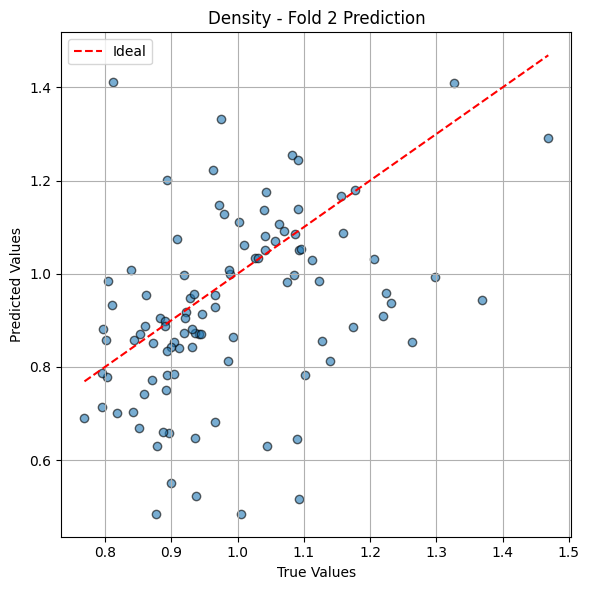


--- Density | Fold 2/6 ---
Epoch 1: Train Loss = 0.0210
Epoch 2: Train Loss = 0.0154
Epoch 3: Train Loss = 0.0121
Epoch 4: Train Loss = 0.0101
Epoch 5: Train Loss = 0.0091
Fold 2 R²: 0.7198 MAE: 0.0752


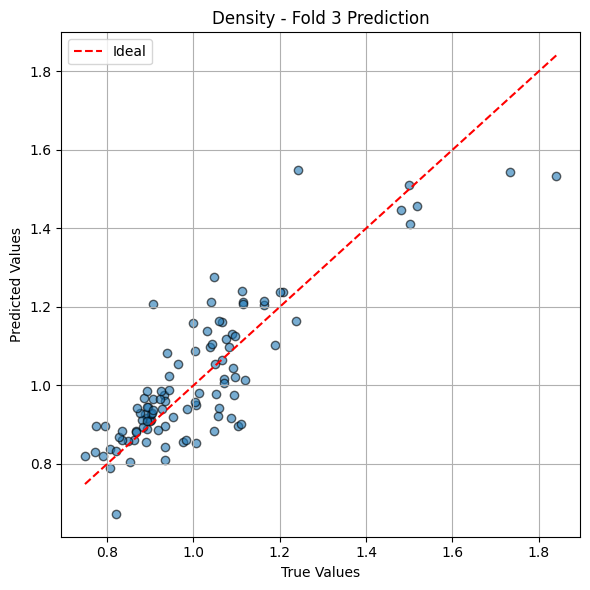


--- Density | Fold 3/6 ---
Epoch 1: Train Loss = 0.0086
Epoch 2: Train Loss = 0.0073
Epoch 3: Train Loss = 0.0061
Epoch 4: Train Loss = 0.0055
Epoch 5: Train Loss = 0.0051
Fold 3 R²: 0.8176 MAE: 0.0524


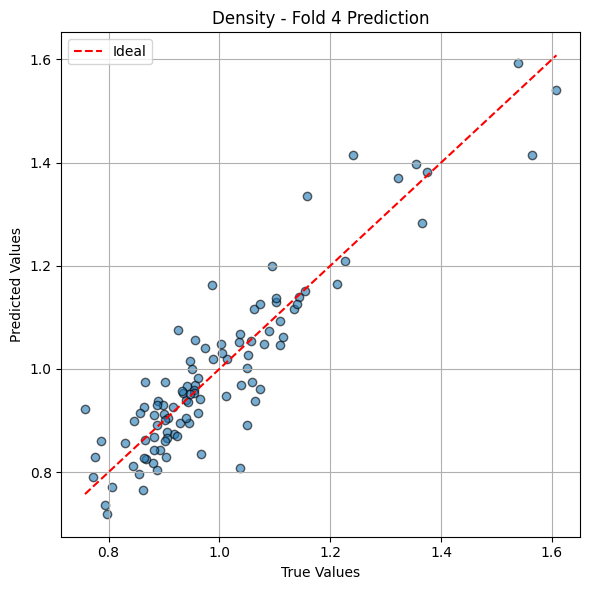


--- Density | Fold 4/6 ---
Epoch 1: Train Loss = 0.0044
Epoch 2: Train Loss = 0.0040
Epoch 3: Train Loss = 0.0034
Epoch 4: Train Loss = 0.0032
Epoch 5: Train Loss = 0.0029
Fold 4 R²: 0.4849 MAE: 0.0510


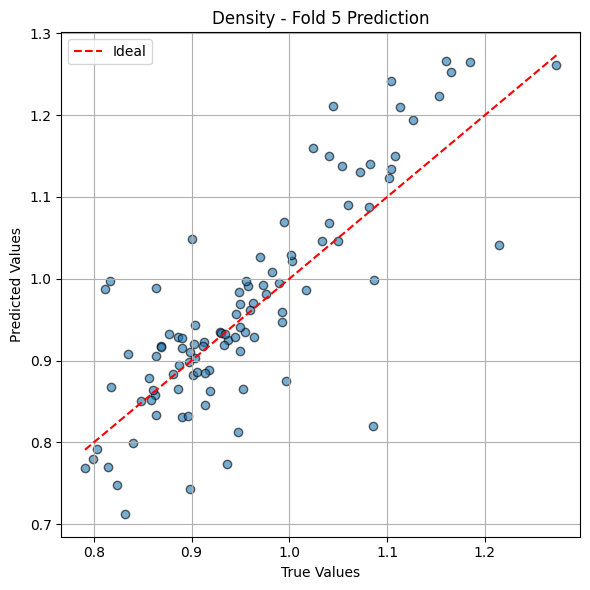


--- Density | Fold 5/6 ---
Epoch 1: Train Loss = 0.0032
Epoch 2: Train Loss = 0.0024
Epoch 3: Train Loss = 0.0027
Epoch 4: Train Loss = 0.0022
Epoch 5: Train Loss = 0.0021
Fold 5 R²: 0.7868 MAE: 0.0410


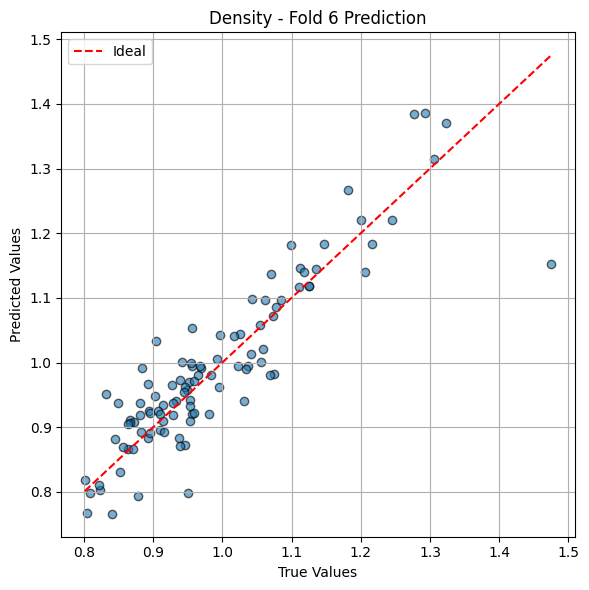


--- Density | Fold 6/6 ---
Epoch 1: Train Loss = 0.0027
Epoch 2: Train Loss = 0.0024
Epoch 3: Train Loss = 0.0021
Epoch 4: Train Loss = 0.0021
Epoch 5: Train Loss = 0.0017
Fold 6 R²: 0.9207 MAE: 0.0294


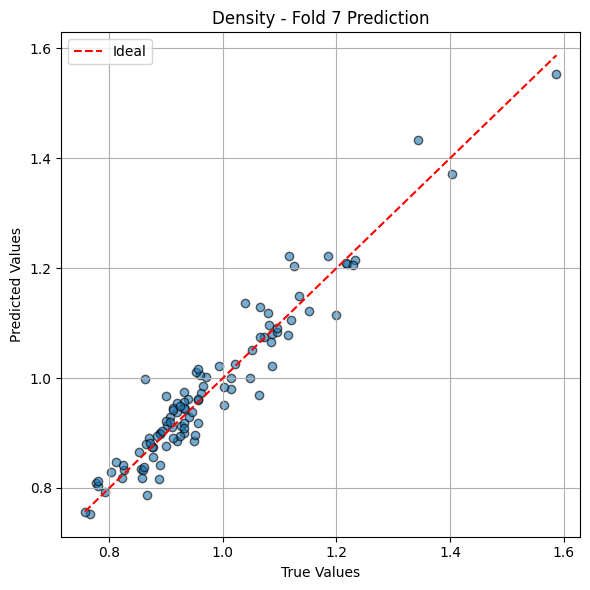


>>> [FINAL] Avg R² for Density: 0.4387


In [32]:
final_Density=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1,morgan_n_bits=10)
final_Model_Density=train_on_all_targets_with_kfold(train_df,final_Density,'Density',epochs=5,num_folds=6)

In [33]:
# final_Tc=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1,morgan_n_bits=1024)
# final_Model_Tc=train_on_all_targets_with_kfold(train_df,final_Tc,'Tc',epochs=6,num_folds=6)

In [34]:
def predict_property(model, target_name, scaler=None):
    """
    Generates predictions for a given target property.

    Args:
        model (torch.nn.Module): The trained multi-target model.
        target_name (str): The name of the target property to predict (e.g., 'FFV').
        scaler (sklearn.preprocessing.StandardScaler, optional): The fitted scaler for the target.
                                                                 If None, no inverse transform is applied.

    Returns:
        pandas.DataFrame: The test DataFrame with an added 'Prediction' column.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # feature_extractor = MolecularFeatureExtractor(device=device)
    
    
    model.eval()
    predictions = []
    
    with torch.no_grad():
        for i, row in test_df.iterrows():
            smiles = row['SMILES']
            try:
                features = model.feature_extractor.extract_combined_features(smiles)
                features_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0).to(device)
                
                # Get the raw prediction from the model
                raw_pred = model(features_tensor, target_name).cpu().numpy()
                predictions.append(raw_pred[0][0])

            except Exception as e:
                print(f"Skipping SMILES: {smiles} due to error: {e}")
                predictions.append(np.nan)

    # Convert list to a 2D array for the scaler
    predictions = np.array(predictions).reshape(-1, 1)

    # Apply inverse transform if a scaler is provided
    if scaler:
        # Use a mask to handle potential NaN values from processing errors
        valid_preds_mask = ~np.isnan(predictions).flatten()
        valid_preds = predictions[valid_preds_mask]
        predictions[valid_preds_mask] = scaler.inverse_transform(valid_preds)

    test_df[target_name] = predictions
    return test_df



# Example 1: Predict 'FFV' WITH the scaler
# print("--- Predicting FFV with inverse scaling ---")
test_df = pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/test.csv')
# test_df = predict_property(final_model_Tg[0], 'FFV')
# print(ffv_results_df.head())

# # print("\n" + "="*50 + "\n")

# # Example 2: Predict 'FFV' WITHOUT the scaler
# print("--- Predicting FFV without inverse scaling (raw model output) ---")
# ffv_raw_results_df = predict_property(my_model, 'FFV', scaler=None)
# print(ffv_raw_results_df.head())

In [35]:
final_Density=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1,morgan_n_bits=512)
Final_Density_Model=MultiTargetModel(final_Density)

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
Final_Tg=MolecularFeatureExtractor(cmpnn_hidden_dim=256)

Final_Model_Tg=MultiTargetModel(Final_Tg)

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
final_Tc=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1,morgan_n_bits=1024)
Final_Model_Tc=MultiTargetModel(final_Tc)

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
final_Rg=MolecularFeatureExtractor(cmpnn_hidden_dim=256,cmpnn_depth=1)
Final_Model_Rg=MultiTargetModel(final_Rg)

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
Tg_Scalar=StandardScaler()
Tg_Scalar.fit(np.array(final_df['Tg']).reshape(-1,1))

StandardScaler()

In [40]:
Rg_Scalar=StandardScaler()
df=train_df[["SMILES","Rg"]].dropna()
Rg_Scalar.fit(np.array(df["Rg"]).reshape(-1,1))

StandardScaler()

In [41]:
Final_Model_Tg.load_state_dict(torch.load('/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Tg.pth'))
# Final_Model_Tg[0].eval()


<All keys matched successfully>

In [42]:
Final_Model_Tc.load_state_dict(torch.load('/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Tc.pth'))

<All keys matched successfully>

In [43]:
final_FFV=MolecularFeatureExtractor(cmpnn_depth=2,cmpnn_hidden_dim=256)
Final_Model_FFV=MultiTargetModel(final_FFV)

Some weights of RobertaModel were not initialized from the model checkpoint at /kaggle/input/my_trained_model/pytorch/default/1 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
Final_Model_Rg.load_state_dict(torch.load('/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Rg.pth'))

<All keys matched successfully>

In [45]:
Final_Density_Model.load_state_dict(torch.load('/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/Densiy.pth'))

<All keys matched successfully>

In [46]:
Final_Model_FFV.load_state_dict(torch.load('/kaggle/input/my_model_for_output_cmpnn/pytorch/default/1/FFV.pth'))

<All keys matched successfully>

In [47]:
# test

In [48]:

ffv_results_df= predict_property(Final_Model_Tg.to('cuda'), 'Tg',Tg_Scalar)
ffv_results_df=predict_property(Final_Model_FFV.to('cuda'), 'FFV')
ffv_results_df=predict_property(Final_Model_Tc.to('cuda'), 'Tc')
ffv_results_df=predict_property(final_Model_Density.to('cuda'), 'Density')
ffv_results_df=predict_property(Final_Model_Rg.to('cuda'), 'Rg',Rg_Scalar)
ffv_results_df.head()

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...,215.769608,0.426607,0.103381,3.601188,25.194704
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...,186.339279,0.447892,-0.033559,3.548730,19.983112
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...,152.172913,0.449220,-0.156921,4.792047,18.660429


In [49]:
ffv_results_df=ffv_results_df.drop('SMILES',axis=1)

In [50]:
ffv_results_df.to_csv('submission.csv', index=False)
